In [5]:
%matplotlib inline
import os
import argparse
import numpy as np
import astropy
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy import wcs
import math


In [23]:
datacube = fits.open('Cube_1160_Clean/Orion_snr.fits')
data = datacube[0].data
header = datacube[0].header
cube = data[:,:,:]
cube.shape

(1, 100, 2000, 2000)

In [7]:
w = wcs.WCS(header, naxis=2)

In [9]:
rp = datacube[0].header['CRPIX3']
rf = datacube[0].header['CRVAL3']
df = datacube[0].header['CDELT3']
nf = datacube[0].header['NAXIS3']
xvals = rf + df*(np.arange(nf)-rp)
xvals_small=xvals[0:100]/10**6
print xvals_small

[ 110.79  110.8   110.81  110.82  110.83  110.84  110.85  110.86  110.87
  110.88  110.89  110.9   110.91  110.92  110.93  110.94  110.95  110.96
  110.97  110.98  110.99  111.    111.01  111.02  111.03  111.04  111.05
  111.06  111.07  111.08  111.09  111.1   111.11  111.12  111.13  111.14
  111.15  111.16  111.17  111.18  111.19  111.2   111.21  111.22  111.23
  111.24  111.25  111.26  111.27  111.28  111.29  111.3   111.31  111.32
  111.33  111.34  111.35  111.36  111.37  111.38  111.39  111.4   111.41
  111.42  111.43  111.44  111.45  111.46  111.47  111.48  111.49  111.5
  111.51  111.52  111.53  111.54  111.55  111.56  111.57  111.58  111.59
  111.6   111.61  111.62  111.63  111.64  111.65  111.66  111.67  111.68
  111.69  111.7   111.71  111.72  111.73  111.74  111.75  111.76  111.77
  111.78]


In [18]:
freq=111.02
slice=np.where(xvals_small==freq)
print str(slice[0])

[23]


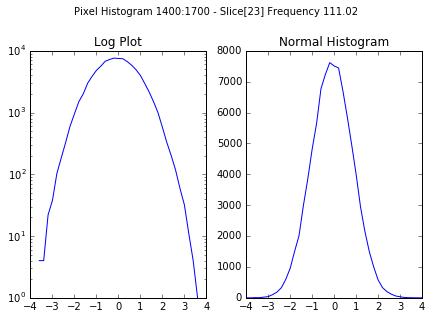

In [46]:
counts,bins = np.histogram(cube[:,slice,1400:1700,1400:1700],bins=np.arange(-5,5,0.2))
fig2=plt.figure()
ax=fig2.add_subplot(1,2,1)
ax.semilogy(bins[:-1],counts)
#ax.set_xlim([-2,2])
plt.suptitle("Pixel Histogram 1400:1700 - Slice" + str(slice[0])+ " Frequency "+ str(freq), y=1.08) 
ax.set_title("Log Plot")
ax.set_xlim([-4,4])
ax2=fig2.add_subplot(1,2,2)
ax2.plot(bins[:-1],counts)
ax2.set_xlim([-4,4])
ax2.set_title("Normal Histogram")
#ax2.set_title("Pixel Histogram 400:700, 400:700")
plt.tight_layout(pad=0.7)

In [47]:
fig2.savefig('Histogram_'+str(slice[0])+'.png')